# Определение параметров, влияющих на выполнение интернет-пользователями целевого действия при просмотре сайта 

                        Автор материала: Максим Сапрыкин
                        
План статьи
1. Введение и постановка задачи
2. Описание набора данных и признаков    
3. Первичный анализ данных
4. Найденные зависимости

# 1. Введение и постановка задачи

В течение последних двух десятилетий в мире и в частности в нашей стране гармонично развивались совершенно новые профессии, связанные с бурной информатизацией общества и распространением сети Интернет. В частности, появились специалисты, занимающиеся электронной комерцией, продажей и продвижением продуктов (товаров или услуг) в интернете - интернет-маркетологи (или иногда digital-маркетологи). 

~~С развитием различных каналов привлечение интернет-трафика, таких как системы контекстной рекламы (**Яндекс Директ, Google AdWords**) или таргетированной рекламы (**Vkontakte Target, myTarget от Mail.Ru** и т.д.) специалисты стали специализировать более узко - появились так называемые директологи(специалисты по контекстной рекламе), таргетологи(специалисты по таргетированной рекламе) и т.д

В настоящее время для любого специалиста в области интернет-рекламы постоянно стоит задача оптимизации своих рекламных кампании, ввиду постоянного роста конкуренции, а следовательно и стоимости рекламы. Такая задача обычно решается с помощью анализа статистической информации о посетителях интернет-площадки, на которой происходит как торговля продуктом (интернет-магазины), так и создание спроса на продукт и плавное подведение посетителя к его покупке (так называемые посадочные страницы - **[landing pages](https://ru.wikipedia.org/wiki/%D0%A6%D0%B5%D0%BB%D0%B5%D0%B2%D0%B0%D1%8F_%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B8%D1%86%D0%B0)**)

Статистика обычно собирается с помощью двух наиболее популярных систем аналитики - Яндекс.Метрика или Google.Analytics. Затем специалист по интернет-рекламе проводит анализ данной статистики с целью поиска закономерностей, позволяющих скорректировать параметры рекламных кампаний таким образом, чтобы повысить их эффективность.

Вот пример из одного из моих реальных проектов:

<center>
<img src="img/1.jpg">

В данном случае в системе аналитики слева в столбце закодирована информация о таких настраиваемых параметрах рекламных кампаний, как формат банера, устройства для отображения, формат оплаты рекламы, дополнительные таргетинги интересов, возраст и пол посетителя. Такие комбинации параметров (а по сути на языке машинного обучения - это подпространства признаков) генерируются исключительно исходя из опыта того или иного специалиста. По приведенному выше скриншоту видно, что данный "срез" аналитики позволяет выявить, различия в показателе качества рекламы ([конверсии](https://goo.gl/xwstfU)) в 4! раза для некоторых комбинаций параметров. Таким образом появляется возможность "отключить" неэффективные рекламыне кампании (комбинации параметров) и повысить общую эффективность рекламного проекта. 

Еще раз необходимо подчеркнуть, что эффективность анализа зависит только от профессионализма специалиста, способного подобрать весомые метрики и составить из них нужные комбинации.

Целью данного исследования является прикладное использование машинного обучения для **получения от обученной модели некоторого количества топ-признаков с их весами, которые могут быть легко интерпретированны, как настраиваемые параметры рекламных кампаний, вносящие наибольший вклад в достижение целевого действия на посещаемом сайте**. Таким образом, появляется идея уменьшить зависимоть эффективности анализа от профессионализма человека и переложить эту задачу на "плечи" математической модели.

# 2. Описание набора данных и признаков

<center>
<img src="img/2.jpg">

Мы будем работать с одним из моих реальных проектов. Я сотрудничаю с компанией, которая занимается установкой натяжных потолков в Москве и области. В течение 1,5 месяцев в начале 2018 года мы плотно тестировали один из наших рекламных сайтов в системе таргетированной рекламы myTarget. Было получено около 3200 переходов на сайт и посетители отправили с сайта около 100 заявок на замер. На этом, хоть и небольшом, количестве данных будем пытаться получить приемлимые результаты.

Сбор данных проводился с помощью описанной в предыдущем параграфе системы аналитики Яндекс.Метрика. Для этого в системе аналитики были построены отчеты и выгружены в формате xls. Каждая строка соответствует посещению сайта одним уникальным посестителем. По столбцам таблицы расположены аналитические метрики, в языке машинного обучения - это и есть признаки, которые мы будем использовать для обучения модели. 

Подробное описание решаемое задачи уже приведено во вступительной части статьи - в пункте 1. Давайте перейдем к описанию признаков.

**Целевой признак** - выполнение определенного действия посетителем на сайте. В нашем конкретном случае это - ввод в форму на сайте номера телефона посетителя и нажатие кнопки "Отправить". Отсюда следует, что **целевой признак - бинарный, а значит решаться будет задача бинарной классификации**. Целевой признак в таблице назвается **Достижение цели**

Теперь опишем признаки, на которых будет обучаться наша модель. Для начала ограничимся признаками, которые можно "вытащить" из системы аналитики. А уже потом будет генерировать свои "мощные" фичи:

**Дата и время визита** - время начала сессии, из которого мы потом будем генерировать новые признаки

**Возраст** - возраст посетителя сайта (пол мы не учитываем, потому что изначально реклама настраивалась только на женщин и все посетители за исключением некоторой погрешности - женщины)

**Объявление** - номер рекламного объявления в системе myTarget

**Сегмент** - заведомо мощный признак, полученный экспертной оценкой, по поторому можно хорошо классифицировать модель. Что это такое и влияние этого признака описано в п.1, он нам нужен, чтобы впринципе оценить всю затею. Если с данным признаком модель будет выдавать ерунду, то значит мы что-то явно делаем не так. В дальнейшем мы его уберём из датасета

**Визиты** - сколько всего раз этот пользователь заходил на сайт в течение сессии

**Поддержка сookies** - поддержка сookies устройством пользователя

**Поддержка Java** - поддержка Java устройством пользователя

**Поддержка JavaScript** - поддержка JavaScript устройством пользователя

**Поддержка Flash** - поддержка Flash устройством пользователя

**Поддержка Silverlight** - поддержка Silverlight устройством пользователя

**Мобильность** - мобильное устройство или нет

**Блокировка рекламы** - установлен ли блокировщик рекламы

**Глубина просмотра** - кол-во страниц, просмотренных посетителем

**Время на сайте** - время, которое посетитель провел на сайте

**Отказность** - Отказ означает, что посетитель провел на сайте менее 15 секунд

**Является ли визит первым визитом посетителя** -  название говорит само за себя

**Визитов в истории** - сколько всего раз этот пользователь заходил на сайт за всю историю

**Дней от первого визита** - сколько прошло дней от первого визита

**Тип устройства** - какой тип у устройства пользователя

**Группа операционных систем** - какая группа операционных систем

**Операционная система (детально)** - какая именно операционная система у пользователя

**Браузер** - какой именно браузер

Как видно, часть признаков - бинарные, часть - категориальные, но всех их еще надо будет привести к подобающему виду.

А пока загрузим все необходимые нам библиотеки и сформируем DataFrame из полученного файла и посмотрим на его структуру и наполнение

In [42]:
from pandas import pandas as pd
import numpy as np

# игнорируем warnings
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (28, 15), 
        "axes.titlesize" : 18 
    }
)

from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [66]:
df = pd.read_excel('data/data.xlsx')

Всего как мы видим 3151 строка и 23 признака, влючая целевой

In [67]:
df.shape

(3151, 23)

In [68]:
df.head()

,Дата и время визита,Возраст,Объявление,Сегмент,Визиты,Достижение цели,Поддержка сookies,Поддержка Java,Поддержка JavaScript,Поддержка Flash,...,Глубина просмотра,Время на сайте,Отказность,Является ли визит первым визитом посетителя,Визитов в истории,Дней от первого визита,Тип устройства,Группа операционных систем,Операционная система (детально),Браузер
0,2018-01-13 00:38:29,48,28728144,90x75_cpc_remont_F45-50,1.0,0,1.0,0.0,1.0,0.0,...,2-3,30 – 59 секунд,Не отказ,Вернувшиеся посетители,4-7,2‑3 дня,ПК,Windows,Windows 10,Opera
1,2018-01-13 09:47:55,57,28728201,90x75_cpc_remont_F55-60,1.0,0,0.0,0.0,1.0,0.0,...,1,0 секунд (отказ),Отказ,Новые посетители,1,0 дней,ПК,Windows,Windows 7 или 2008 Server,Firefox
2,2018-01-13 14:14:08,48,28728144,90x75_cpc_remont_F45-50,1.0,0,0.0,0.0,1.0,0.0,...,1,10 – 29 секунд,Не отказ,Вернувшиеся посетители,8-15,2‑3 дня,ПК,Windows,Windows 10,Opera
3,2018-01-14 16:34:35,59,28728201,90x75_cpc_remont_F55-60,1.0,0,0.0,0.0,1.0,0.0,...,1,0 секунд (отказ),Отказ,Вернувшиеся посетители,2-3,2‑3 дня,ПК,Windows,Windows 8.1,Firefox
4,2018-01-15 09:30:56,50,28728192,90x75_cpc_remont_F50-55,1.0,0,1.0,0.0,1.0,1.0,...,1,0 секунд (отказ),Отказ,Новые посетители,1,0 дней,ПК,Windows,Windows XP,Firefox


Из описания датафрейма ниже видно, что есть пара пропусков, что впринципе не страшно, заполним потом их. Также видно, что у нас достаточно много категориальных признаков, из которых мы сможем построить в перспективе еще несколько бинарных признаков с помощью OneHotEncoder

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3151 entries, 0 to 3150
Data columns (total 23 columns):
Дата и время визита                            3151 non-null object
Возраст                                        3151 non-null int64
Объявление                                     3151 non-null int64
Сегмент                                        3151 non-null object
Визиты                                         3149 non-null float64
Достижение цели                                3151 non-null int64
Поддержка сookies                              3149 non-null float64
Поддержка Java                                 3149 non-null float64
Поддержка JavaScript                           3149 non-null float64
Поддержка Flash                                3149 non-null float64
Поддержка Silverlight                          3149 non-null float64
Мобильность                                    3149 non-null float64
Блокировка рекламы                             3149 non-null float64
Глуб

# 3. Первичный анализ данных (в том числе визуальный)


### Целевой признак
Начнём с изучения распределения целевого признака. Уже исходя из описания задачи понятно, что **выборка будет несбалансированная**. Не может быть такого, чтобы половина посетителей оставляла заявки, а половина нет. Процент конверсии (отношение кол-ва посетителей, достигших цели, к общему кол-ву посетителей за выбранный период времени) в среднем по больнице обычно составляет 3-8%. При таких показателях обычно считается, что можно работать.

Посмотрим на фактическое распределение целевого признака:

In [70]:
df['Достижение цели'].value_counts()

0    3064
1      87
Name: Достижение цели, dtype: int64

В нашем случае конверсия сайта проходит как раз по нижней условной границе. Работать можно, но крайне желательно конверсию поднять. Чем мы и занимаемся

In [100]:
counts = df['Достижение цели'].value_counts()
print("Конверсия сайта: {}%".format(round(counts[1]/counts[0], 3) * 100))

Конверсия сайта: 2.8000000000000003%


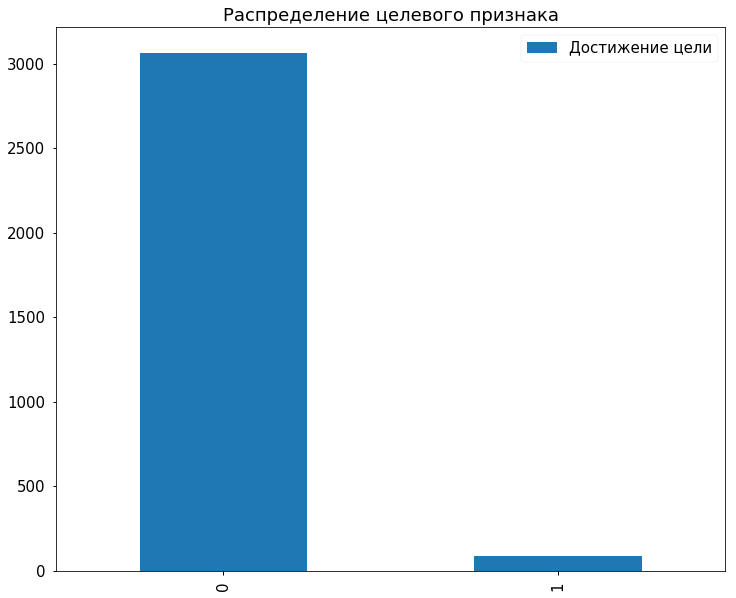

In [72]:
counts.plot(kind='bar');
plt.legend();
plt.title('Распределение целевого признака');

### Сегмент
Посмотрим, как влияют раличные признаки на целевой. Начнём с заведомо "мощного" признака - сегмент. И, к счастью, ничего удивительно, кроме пяти сегментов почти без данных и четырёх с малым количеством данных. 

In [73]:
pd.crosstab(df['Достижение цели'], df['Сегмент'], margins=True)

Сегмент,90x75_cpc_remont_F40-45,90x75_cpc_remont_F45-50,90x75_cpc_remont_F50-55,90x75_cpc_remont_F55-60,90x75_cpc_wide_F30-40,90x75_cpc_wide_F40-50,90x75_cpm_remont_F40-45,90x75_cpm_remont_F45-50,native_desktop_cpc_remont_F40-45,native_desktop_cpc_remont_F45-50,native_desktop_cpc_remont_F50-55,native_mobile_cpc_remont_F40-45,native_mobile_cpc_remont_F45-50,native_mobile_cpc_remont_F50-55,native_mobile_cpc_remont_F55-60,native_mobile_cpm_remont_F40-45,native_mobile_cpm_remont_F50-55,All
Достижение цели,,,,,,,,,,,,,,,,,,
0,209,166,178,185,1,3,5,1,30,38,32,600,497,649,442,4,24,3064
1,6,1,7,4,0,0,0,0,1,0,0,27,13,21,7,0,0,87
All,215,167,185,189,1,3,5,1,31,38,32,627,510,670,449,4,24,3151


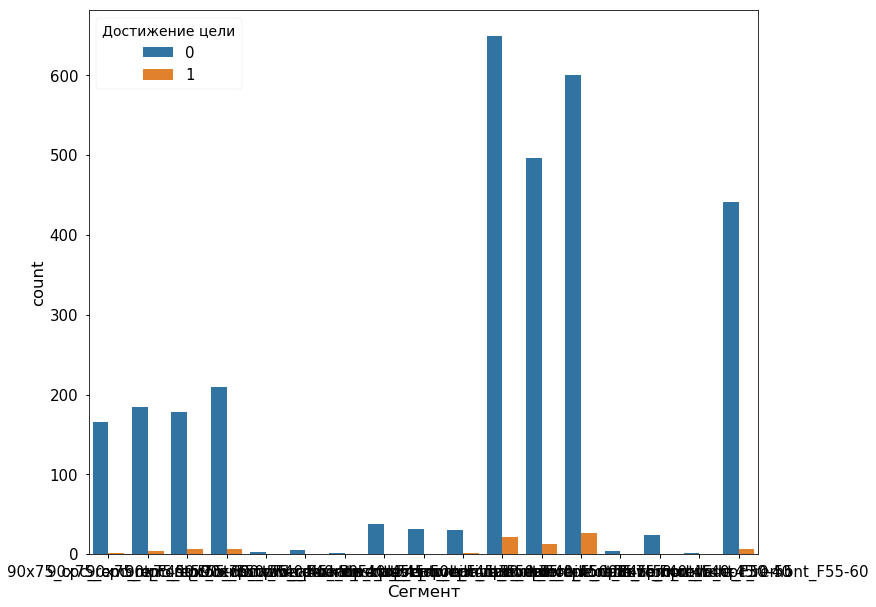

In [60]:
sns.countplot(x='Сегмент', hue='Достижение цели', data=df);

### Мобильность устройства
Теперь посмотрим, как влияет мобильность устройства на целевой признак. А тут уже достаточно интересно. Мы видим 5 аномальных значений, которые делают бинарный признак по сути категориальным. По идее, устройство может быть либо мобильным, либо нет. 

In [81]:
mob_tab = pd.crosstab(df['Достижение цели'], df['Мобильность'], margins=True)
mob_tab

Мобильность,0.0,0.5,1.0,All
Достижение цели,,,,
0,849,5,2208,3062
1,18,0,69,87
All,867,5,2277,3149


Давайте посмотрим в датасете на строки, которые соответсвуют этому аномальному значению 0.5

In [75]:
df[df['Мобильность'] == 0.5]

,Дата и время визита,Возраст,Объявление,Сегмент,Визиты,Достижение цели,Поддержка сookies,Поддержка Java,Поддержка JavaScript,Поддержка Flash,...,Глубина просмотра,Время на сайте,Отказность,Является ли визит первым визитом посетителя,Визитов в истории,Дней от первого визита,Тип устройства,Группа операционных систем,Операционная система (детально),Браузер
583,2018-01-23 10:57:35,57,29071641,90x75_cpc_remont_F55-60,2.0,0,0.0,0.0,1.0,0.0,...,1,0 секунд (отказ),Отказ,Новые посетители,1,0 дней,ПК,Windows,Windows 7 или 2008 Server,Opera
751,2018-01-25 09:26:04,41,29100965,native_mobile_cpc_remont_F40-45,2.0,0,0.5,0.0,1.0,0.5,...,1,0 секунд (отказ),Отказ,Новые посетители,1,0 дней,ПК,Windows,Windows 7 или 2008 Server,Opera
752,2018-01-25 09:26:04,52,29072167,native_desktop_cpc_remont_F50-55,2.0,0,0.5,0.0,1.0,0.5,...,1,0 секунд (отказ),Отказ,Новые посетители,1,0 дней,ПК,Windows,Windows 7 или 2008 Server,Opera
2099,2018-02-21 10:20:36,43,29270212,native_mobile_cpc_remont_F40-45,2.0,0,0.0,0.5,1.0,0.0,...,1,0 секунд (отказ),Отказ,Вернувшиеся посетители,2-3,4‑7 дней,ПК,Windows,Windows 2003 Server или XP Pro x64,Google Chrome
2100,2018-02-21 10:20:36,53,29270215,native_mobile_cpc_remont_F50-55,2.0,0,0.0,0.5,1.0,0.0,...,1,0 секунд (отказ),Отказ,Вернувшиеся посетители,2-3,4‑7 дней,ПК,Windows,Windows 2003 Server или XP Pro x64,Google Chrome


Ну тут уже все становится понятно. Обратим внимание на столбец Визиты. В рамках одной сесссии, посетитель захоил с разных устройств. Одно было мобильным, а другое десктопом. Отсюда и возникает путаница. 

По идее, было бы круто, если бы объекты со значением признака мобильности 0.5 имели принадлежность к искомому классу целевого признака. Тогда бы мы действительно стали использовать этот признак как категориальный. Но нет. А вот напротив, мы видим, что как бинарный признак, он очень хорошо нам подходит.  Давайте посмотрим на конверсию сайта отдельно для мобильных и не мобильных устройств

In [105]:
conv_desctop = round(mob_tab[0][1]/mob_tab[0]['All'],4)*100
conv_mob = round(mob_tab[1][1]/mob_tab[1]['All'],4)*100

print('немобильное устройство: {}%\nмобильное устройство: {}%'.format(conv_desctop, conv_mob))

немобильное устройство: 2.08%
мобильное устройство: 3.0300000000000002%


Результат хороший, мобильные устройства в 1,5 раза увеличивают конверсию сайта!

### Тип устройства

А что если посмотреть еще подробнее - не просто мобильные и не мобильные, а детальнее: ПК, Планшеты и Смартфоны. 

In [110]:
tab = pd.crosstab(df['Достижение цели'], df['Тип устройства'], margins=True)
tab

Тип устройства,ПК,Планшеты,Смартфоны,All
Достижение цели,,,,
0,854,282,1926,3062
1,18,8,61,87
All,872,290,1987,3149


In [114]:
conv_pk = round(tab['ПК'][1]/tab['ПК']['All'],4)*100
conv_tablet = round(tab['Планшеты'][1]/tab['Планшеты']['All'],4)*100
conv_phone = round(tab['Смартфоны'][1]/tab['Смартфоны']['All'],4)*100

print('ПК: {}%\nПланшет: {}%\nСмартфон: {}%'.format(conv_pk, conv_tablet, conv_phone))

ПК: 2.06%
Планшет: 2.76%
Смартфон: 3.0700000000000003%


Видим, что посетители со смартфонов немного качественнее в смысле достижения целей. Это тоже важно, хотя вцелом конверсия не сильно повысилась

### Возраст


А теперь посмотрим на признак Возраст. И здесь нас ждёт много интересного. Ну во-первых, есть совсем "плохие" возраста. Например видно, что за 1,5 месяца ни один человек в возрасте 47 лет не оставил заявку на сайте. Но на самом деле трудно себе представить, что женщины в 47 лет внезапно осознают, что они никогда не закажут натяжные потолки на таких сайтах как наш. И скорее тут все-таки мало статистики. 

Во-вторых, в повседневной практике принято смотреть распределения целевого признака не по каждому значению возраста, а по некоторым диапазонам. То есть можно сделать новые признаки: диапазоны по 2,3,4 и 5 лет и посмотреть на результаты. И интерпретируемость у таких признаков горзадо лучше, потому что рекламные платформы позволяют настраивать в таргетингах как раз диапазоны возрастов

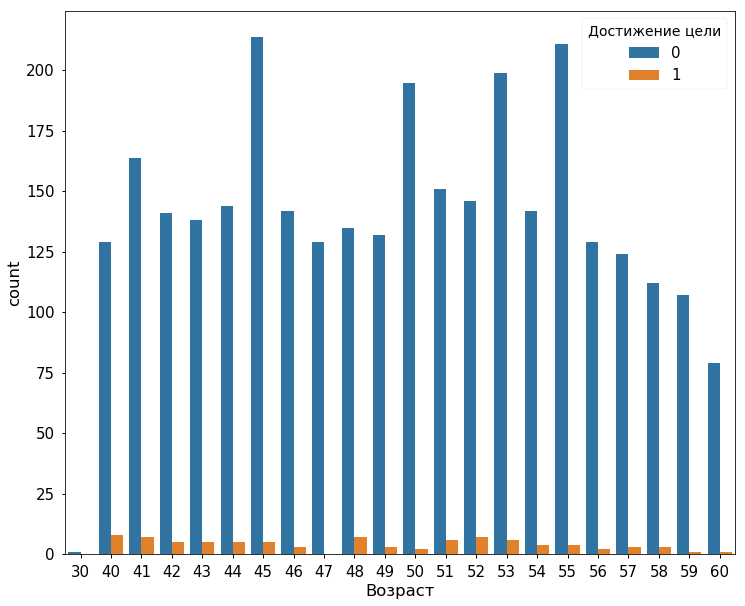

In [116]:
sns.countplot(x='Возраст', hue='Достижение цели', data=df);

### Объявление

Одним из важнейшних параметров рекламной кампании является рекламное объявление. Давайте посмотрим, как то или иное объявление влияет на целевой признак


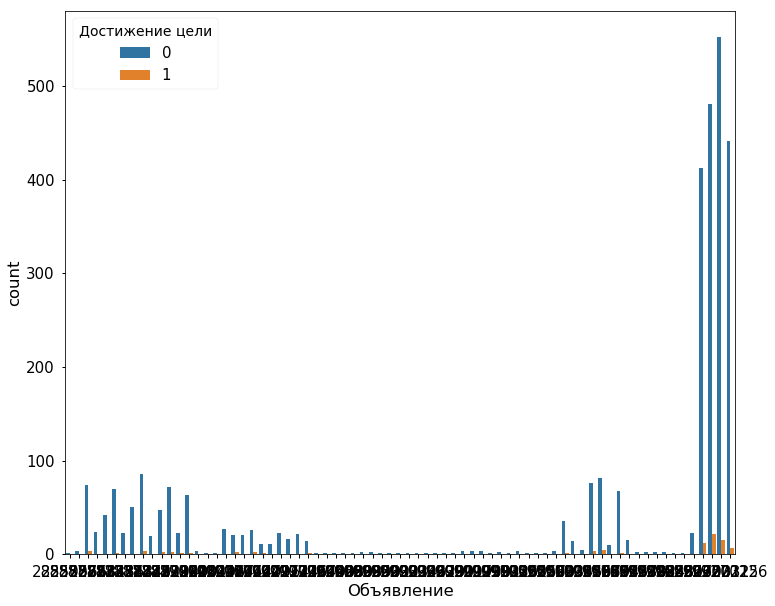

In [117]:
sns.countplot(x='Объявление', hue='Достижение цели', data=df);

На самом деле такой первичный анализ взаимосвязи признаков и в частности зависимоти целевого признака от прочих - это базовая функциональность любой системы аналитики и ,как уже было сказано, фундаметальная задача специалиста по интернет-рекламе - как раз поиск весомых признаков с помощью систем аналитики. Мы же проделали ту же самую работу но уже с помощью Pandas. И получили некий baseline для будущих моделей.

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3151 entries, 0 to 3150
Data columns (total 23 columns):
Дата и время визита                            3151 non-null object
Возраст                                        3151 non-null int64
Объявление                                     3151 non-null int64
Сегмент                                        3151 non-null object
Визиты                                         3149 non-null float64
Достижение цели                                3151 non-null int64
Поддержка сookies                              3149 non-null float64
Поддержка Java                                 3149 non-null float64
Поддержка JavaScript                           3149 non-null float64
Поддержка Flash                                3149 non-null float64
Поддержка Silverlight                          3149 non-null float64
Мобильность                                    3149 non-null float64
Блокировка рекламы                             3149 non-null float64
Глуб

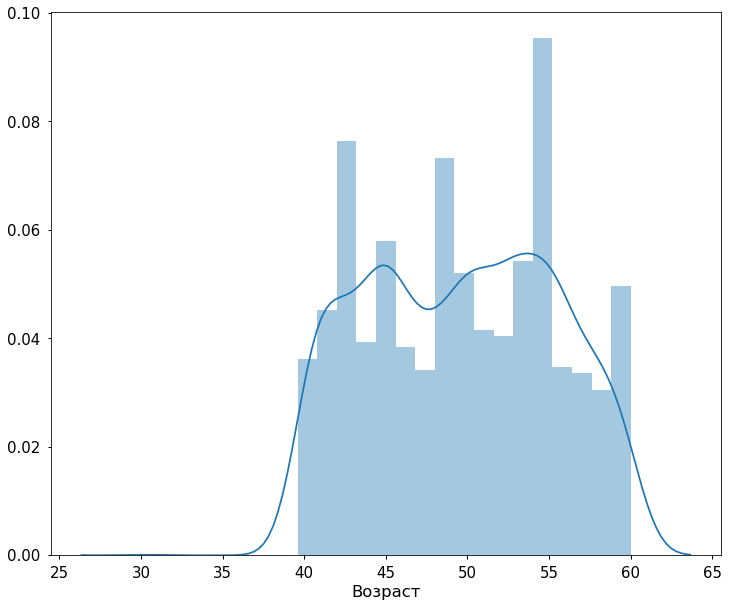

In [127]:
sns.distplot(df['Возраст'])

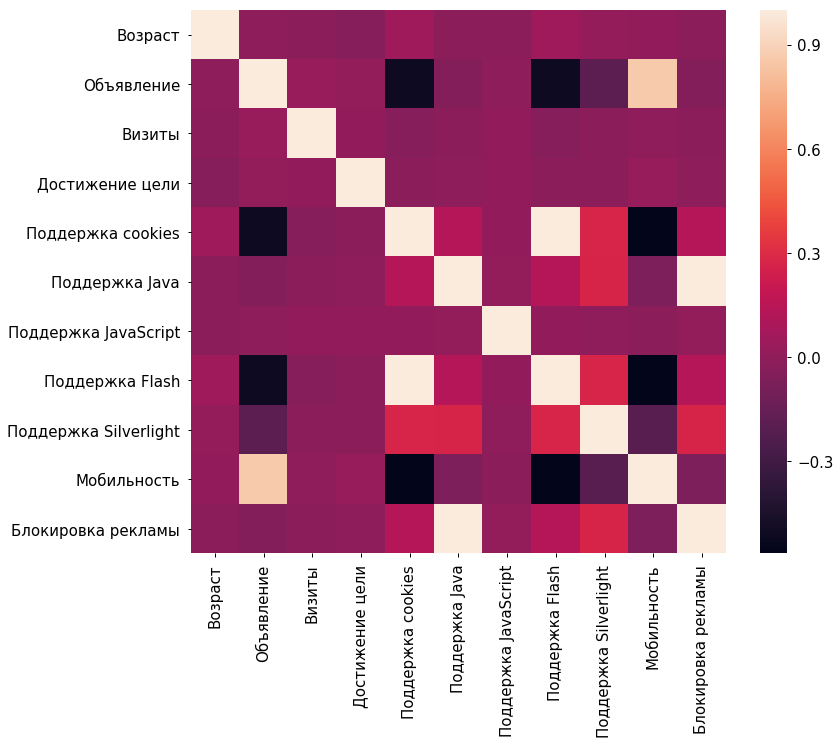

In [119]:
sns.heatmap(df.corr())

https://github.com/blue-yonder/tsfresh

### 4. Найденные зависимости

https://www.coursera.org/learn/supervised-learning/lecture/M97UX/niesbalansirovannyie-dannyie - как работать с несбалансированными выборками

# Подумать , мб стоит рассмотерь целевой признак - конверсию и посмотреть какие признаки влияют на нее? но тогда у нас будет маленький датасет - хуйня. Но как показатель качества его ввести надо
